<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

As an employee of College Board, I am in a team that analyzes that trends and insights from the data we gathered each year to provide to our executive board. Since this is year 2020, we would like to evaluate the last 3 years SAT score by state and by intended college major to see if there are any key insights we can use to leverage and improve our test. 

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

As an employee of College Board, I am in a team that analyzes that trends and insights from the data we gathered each year to provide to our executive board. Since this is year 2020, we would like to evaluate the last 3 years SAT score by state and by intended college major to see if there are any key insights we can use to leverage and improve our test.

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
my_list = [2,3,4,5,6]

def mean_value(x):
    return sum(x)/len(x)

mean_value(my_list)

4.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
def std_value(x):
    summation = 0
    avg = mean_value(x)
    for i in x:
        summation += (i - avg)**2
    return (summation/len(x))**0.5
        
std_value(my_list)

1.4142135623730951

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
def percent_convert(x):
    return float(x.strip('%'))/100

percent_convert('95%')

0.95

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

In [4]:
# Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

## Data Import and Cleaning

In [5]:
#import data
sat_2017 = pd.read_csv('data/sat_2017.csv')
sat_2018 = pd.read_csv('data/sat_2018.csv')
sat_2019 = pd.read_csv('data/sat_2019.csv')
sat_major = pd.read_csv('data/sat_2019_by_intended_college_major.csv')

### 1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.

In [6]:
#display first 5 rows of SAT 2017 data 
sat_2017.head(5)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [7]:
#check SAT 2017 info
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [8]:
#display first 5 rows of SAT 2018 data
sat_2018.head(5)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [9]:
#check sat 2018 info
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [10]:
#display first 5 rows of SAT 2019 data
sat_2019.head(5)

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [11]:
#check SAT 2019 info
sat_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [12]:
#display first 5 rows of SAT college majors data
sat_major.head(5)

,IntendedCollegeMajor,TestTakers,Percent,Total,ReadingWriting,Math
0,"Agriculture, AgricultureOperations, and Relate...","24,913",1%,977,496,481
1,Architecture and Related Services,"28,988",2%,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies","2,629",0%,1040,536,504
3,Biological and Biomedical Sciences,"155,834",8%,1139,572,566
4,"Business, Management, Marketing, and Related S...","221,523",12%,1072,534,537


In [13]:
#check SAT college majors info
sat_major.info()
#this is national level
#you can check which is the top 
#states with avg score less than 1139, 
#mean that required
#students from this state may not be able to these majors
#compared math, reading and total

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   IntendedCollegeMajor  38 non-null     object
 1   TestTakers            38 non-null     object
 2   Percent               38 non-null     object
 3   Total                 38 non-null     int64 
 4   ReadingWriting        38 non-null     int64 
 5   Math                  38 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.9+ KB


### 2. Check for missing values.

In [14]:
#check if SAT 2017 has null values
sat_2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [15]:
#check if SAT 2018 has null values
sat_2018.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [16]:
#check if SAT 2019 has null values
sat_2019.isnull().sum()

State                 0
Participation Rate    0
EBRW                  0
Math                  0
Total                 0
dtype: int64

In [17]:
#check if SAT college majors has null values
sat_major.isnull().sum()

IntendedCollegeMajor    0
TestTakers              0
Percent                 0
Total                   0
ReadingWriting          0
Math                    0
dtype: int64

There are no missing values in all 4 datasets.

### 3. Check for any obvious issues with the observations and fix the issues


Let's check and fix the issues with SAT 2017 data first.

In [18]:
#check total rows of SAT 2017 data
print(len(sat_2017))

#the total SAT score must have the range of 400-1600.
print(len(sat_2017[(400 <= sat_2017['Total']) & (sat_2017['Total'] <= 1600)]))

#Each section of SAT must have the score range of 200-800. The data seems correct.
print(len(sat_2017[(200 <= sat_2017['Evidence-Based Reading and Writing']) &  (sat_2017['Evidence-Based Reading and Writing'] <= 800)]))

#Each section of SAT must have the score range of 200-800. 
print(len(sat_2017[(200 <= sat_2017['Math']) &  (sat_2017['Math'] <= 800)]))

51
51
51
50


In [19]:
#search for any rows in sat_2017 dataset with Math column value below 200
sat_2017.loc[sat_2017.loc[:,'Math'] < 200,:]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [20]:
#input the right value by takng the difference between total score and Evidence-Based Reading and Writing score
sat_2017.loc[sat_2017.loc[:,'State']=='Maryland','Math'] = sat_2017.loc[sat_2017.loc[:,'State']=='Maryland','Total'] - sat_2017.loc[sat_2017.loc[:,'State']=='Maryland','Evidence-Based Reading and Writing']
sat_2017.loc[sat_2017.loc[:,'State']=='Maryland',:]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


SAT 2017 dataset has one incorrect data value, which is the avergage math score for Maryland. Since we have the average total score and average Evidence-Based Reading and Writing score, we can just replace the wrong value with the difference between those two sections. 

Now, let's check and fix the issues with SAT 2018 data.

In [21]:
#check total rows of SAT 2018 data
print(len(sat_2018))

#the total SAT score must have the range of 400-1600.
print(len(sat_2018[(400 <= sat_2018['Total']) & (sat_2018['Total'] <= 1600)]))

#Each section of SAT must have the score range of 200-800. The data seems correct.
print(len(sat_2018[(200 <= sat_2018['Evidence-Based Reading and Writing']) &  (sat_2018['Evidence-Based Reading and Writing'] <= 800)]))

#Each section of SAT must have the score range of 200-800. The data seems correct.
print(len(sat_2018[(200 <= sat_2018['Math']) &  (sat_2018['Math'] <= 800)]))

51
51
51
51


SAT 2018 data seems fine. Now, let's check SAT 2019 dataset.

In [22]:
#check total rows of SAT 2019 data
print(len(sat_2019))

#the total SAT score must have the range of 400-1600.
print(len(sat_2019[(400 <= sat_2019['Total']) & (sat_2019['Total'] <= 1600)]))

#Each section of SAT must have the score range of 200-800. The data seems correct.
print(len(sat_2019[(200 <= sat_2019['EBRW']) &  (sat_2019['EBRW'] <= 800)]))

#Each section of SAT must have the score range of 200-800. The data seems correct.
print(len(sat_2019[(200 <= sat_2019['Math']) &  (sat_2019['Math'] <= 800)]))

53
53
53
53


Since SAT 2019 has 53 rows while SAT 2017 and 2018 datasets have 51 rows. We need to check what are the different rows by using set.

In [23]:
sat2019 = list(sat_2019['State'].unique())
sat2018 = list(sat_2018['State'].unique())
sat2017 = list(sat_2017['State'].unique())

print(set(sat2019).difference(set(sat2018))) #check the difference between SAT 2019 vs SAT 2018
print(set(sat2019).difference(set(sat2017))) #check the difference between SAT 2019 vs SAT 2017
print(set(sat2018).difference(set(sat2017))) #check the difference between SAT 2018 vs SAT 2017

{'Puerto Rico', 'Virgin Islands'}
{'Puerto Rico', 'Virgin Islands'}
set()


We found that SAT 2019 dataset has included Puerto Rico and Virgin Islands in the datasets while the two previous year dataset did not. We will drop those rows in the next section.


Let's check SAT by college major dataset.

In [24]:
#check total rows of SAT college major data
print(len(sat_major))

#the total SAT score must have the range of 400-1600.
print(len(sat_major[(400 <= sat_major['Total']) & (sat_major['Total'] <= 1600)]))

#Each section of SAT must have the score range of 200-800. The data seems correct.
print(len(sat_major[(200 <= sat_major['ReadingWriting']) &  (sat_major['ReadingWriting'] <= 800)]))

#Each section of SAT must have the score range of 200-800. The data seems correct.
print(len(sat_major[(200 <= sat_major['Math']) &  (sat_major['Math'] <= 800)]))

38
38
38
38


Now, let's see if there is any duplicated row in these datasets

In [25]:
display(sat_2017[sat_2017.duplicated()])
display(sat_2018[sat_2018.duplicated()])
display(sat_2019[sat_2019.duplicated()])
display(sat_major[sat_major.duplicated()])

,State,Participation,Evidence-Based Reading and Writing,Math,Total


,State,Participation,Evidence-Based Reading and Writing,Math,Total


,State,Participation Rate,EBRW,Math,Total


,IntendedCollegeMajor,TestTakers,Percent,Total,ReadingWriting,Math


Luckily, there are no duplicated rows in our datasets.

### 4. Display the data types of each feature.

In [26]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [27]:
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [28]:
sat_2019.dtypes

State                 object
Participation Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object

In [29]:
sat_major.dtypes

IntendedCollegeMajor    object
TestTakers              object
Percent                 object
Total                    int64
ReadingWriting           int64
Math                     int64
dtype: object

### 5. Fix any incorrect data types 

First, we remove % and replace - with 0 in each of our datasets.

In [30]:
#remove % and - from Participation Rate for each dataset
sat_2017['Participation'] = sat_2017['Participation'].str.replace(r'%','').replace(r'—','0')
display(sat_2017.head())

sat_2018['Participation'] = sat_2018['Participation'].str.replace(r'%','').replace(r'—','0')
display(sat_2018.head())

sat_2019['Participation Rate'] = sat_2019['Participation Rate'].str.replace(r'%','').replace(r'—','0')
display(sat_2019.head())

sat_major['Percent'] = sat_major['Percent'].str.replace(r'%','').replace(r'—','0')
display(sat_major.head())

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6,595,571,1166
1,Alaska,43,562,544,1106
2,Arizona,29,577,572,1149
3,Arkansas,5,592,576,1169
4,California,60,540,536,1076


,State,Participation Rate,EBRW,Math,Total
0,Alabama,7,583,560,1143
1,Alaska,41,556,541,1097
2,Arizona,31,569,565,1134
3,Arkansas,6,582,559,1141
4,California,63,534,531,1065


,IntendedCollegeMajor,TestTakers,Percent,Total,ReadingWriting,Math
0,"Agriculture, AgricultureOperations, and Relate...","24,913",1,977,496,481
1,Architecture and Related Services,"28,988",2,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies","2,629",0,1040,536,504
3,Biological and Biomedical Sciences,"155,834",8,1139,572,566
4,"Business, Management, Marketing, and Related S...","221,523",12,1072,534,537


Secondly, we convert participation rate into float.

In [31]:
#convert Participation Rate to float
sat_2017['Participation'] = sat_2017['Participation'].map(lambda parti: float(parti))
display(sat_2017.dtypes)

sat_2018['Participation'] = sat_2018['Participation'].map(lambda parti: float(parti))
display(sat_2018.dtypes)

sat_2019['Participation Rate'] = sat_2019['Participation Rate'].map(lambda parti: float(parti))
display(sat_2019.dtypes)

sat_major['Percent'] = sat_major['Percent'].str.replace(r'%','').map(lambda parti: float(parti))
display(sat_major.dtypes)

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

State                  object
Participation Rate    float64
EBRW                    int64
Math                    int64
Total                   int64
dtype: object

IntendedCollegeMajor     object
TestTakers               object
Percent                 float64
Total                     int64
ReadingWriting            int64
Math                      int64
dtype: object

### 6. Rename Columns.

In [32]:
#check the column names in each dataset
print(sat_2017.columns)
print(sat_2018.columns)
print(sat_2019.columns)
print(sat_major.columns)

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')
Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')
Index(['State', 'Participation Rate', 'EBRW', 'Math', 'Total'], dtype='object')
Index(['IntendedCollegeMajor', 'TestTakers', 'Percent', 'Total',
       'ReadingWriting', 'Math'],
      dtype='object')


In [33]:
#rename columns in each dataset
sat_2017.columns = ['state','participation','verbal','math','total']
sat_2018.columns = ['state','participation','verbal','math','total']
sat_2019.columns = ['state','participation','verbal','math','total']
sat_major.columns = ['intended_major','participation_number','participation','total','verbal','math']

print(sat_2017.columns)
print(sat_2018.columns)
print(sat_2019.columns)
print(sat_major.columns)

Index(['state', 'participation', 'verbal', 'math', 'total'], dtype='object')
Index(['state', 'participation', 'verbal', 'math', 'total'], dtype='object')
Index(['state', 'participation', 'verbal', 'math', 'total'], dtype='object')
Index(['intended_major', 'participation_number', 'participation', 'total',
       'verbal', 'math'],
      dtype='object')


### 7. Drop unnecessary rows (if needed).

First, we drop the two extra rows of Puerto Rico and Virgin Island we found in SAT 2019 dataset. Since our 2017 and 2018 datasets do not have the data on these two states, there is no need to keep these data as we cannot do any analysis.

In [34]:
#drop Puerto Rico and Virgin Island in SAT 2019 dataset
sat_2019.drop(sat_2019.loc[(sat_2019['state'] == 'Virgin Islands')].index, inplace = True)
sat_2019.drop(sat_2019.loc[(sat_2019['state'] == 'Puerto Rico')].index, inplace = True)

In [35]:
#reset index after droppping
sat_2019.reset_index(drop=True).head()

,state,participation,verbal,math,total
0,Alabama,7.0,583,560,1143
1,Alaska,41.0,556,541,1097
2,Arizona,31.0,569,565,1134
3,Arkansas,6.0,582,559,1141
4,California,63.0,534,531,1065


In SAT major dataset, we do not need participation_number since we already have participation rate. 

In [36]:
#drop 'participationnumber_major' because we already have participation rate 
sat_major.pop('participation_number')

0      24,913
1      28,988
2       2,629
3     155,834
4     221,523
5      36,332
6      79,736
7       2,500
8      71,882
9     194,127
10     33,595
11     16,233
12      6,469
13      9,936
14    331,026
15     12,611
16     35,788
17      8,611
18        283
19     16,508
20      6,592
21      7,448
22      2,979
23     10,147
24     13,039
25      6,668
26      3,381
27     26,318
28        319
29     75,626
30      7,852
31     68,177
32     33,356
33      1,991
34      1,105
35    130,642
36     26,888
37    126,939
Name: participation_number, dtype: object

In [37]:
sat_major.head(5)

,intended_major,participation,total,verbal,math
0,"Agriculture, AgricultureOperations, and Relate...",1.0,977,496,481
1,Architecture and Related Services,2.0,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies",0.0,1040,536,504
3,Biological and Biomedical Sciences,8.0,1139,572,566
4,"Business, Management, Marketing, and Related S...",12.0,1072,534,537


### 8. Merge dataframes that can be merged.

We are going to merge SAT 2017, 2018, 2019 into one dataset.

In [38]:
#merge 'sat_2017' with 'sat_2018' in 'sat_1718'
sat_1718 = pd.merge(sat_2017, sat_2018, on = 'state', suffixes = ['_sat2017', '_sat2018'], how = 'outer')
sat_1718.head()

,state,participation_sat2017,verbal_sat2017,math_sat2017,total_sat2017,participation_sat2018,verbal_sat2018,math_sat2018,total_sat2018
0,Alabama,5.0,593,572,1165,6.0,595,571,1166
1,Alaska,38.0,547,533,1080,43.0,562,544,1106
2,Arizona,30.0,563,553,1116,29.0,577,572,1149
3,Arkansas,3.0,614,594,1208,5.0,592,576,1169
4,California,53.0,531,524,1055,60.0,540,536,1076


In [39]:
#merge 'sat_1718' with 'sat_2019' in sat_3years
sat_3years = pd.merge(sat_1718, sat_2019, on = 'state', how = 'outer')
sat_3years.head()

,state,participation_sat2017,verbal_sat2017,math_sat2017,total_sat2017,participation_sat2018,verbal_sat2018,math_sat2018,total_sat2018,participation,verbal,math,total
0,Alabama,5.0,593,572,1165,6.0,595,571,1166,7.0,583,560,1143
1,Alaska,38.0,547,533,1080,43.0,562,544,1106,41.0,556,541,1097
2,Arizona,30.0,563,553,1116,29.0,577,572,1149,31.0,569,565,1134
3,Arkansas,3.0,614,594,1208,5.0,592,576,1169,6.0,582,559,1141
4,California,53.0,531,524,1055,60.0,540,536,1076,63.0,534,531,1065


In [40]:
#Rename columns for 'sat_2019' to make them all consistent
sat_3years.rename(columns = {'participation': 'participation_sat2019', 'verbal' : 'verbal_sat2019', 'math':'math_sat2019', 'total':'total_sat2019'}, inplace = True)
sat_3years.head()

,state,participation_sat2017,verbal_sat2017,math_sat2017,total_sat2017,participation_sat2018,verbal_sat2018,math_sat2018,total_sat2018,participation_sat2019,verbal_sat2019,math_sat2019,total_sat2019
0,Alabama,5.0,593,572,1165,6.0,595,571,1166,7.0,583,560,1143
1,Alaska,38.0,547,533,1080,43.0,562,544,1106,41.0,556,541,1097
2,Arizona,30.0,563,553,1116,29.0,577,572,1149,31.0,569,565,1134
3,Arkansas,3.0,614,594,1208,5.0,592,576,1169,6.0,582,559,1141
4,California,53.0,531,524,1055,60.0,540,536,1076,63.0,534,531,1065


In [41]:
#check data shape
sat_3years.shape

(51, 13)

### 9. Save and export data

In [42]:
#save and export sat_3years into csv file
sat_3years.to_csv('sat_3years.csv', index = False)

In [43]:
#save and export sat_major into csv file
sat_major.to_csv('sat_major.csv', index = False)

## Data Dictionary

### Data Dictionary for sat_3years dataset

 
|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|sat_3years|List of states in the United States| 
|participation_sat2017|float|sat_3years|Percentage of students who took SAT test in 2017|
|total_sat2017|int|sat_3years|Average total SAT score in 2017, range between 400 and 1600| 
|verbal_sat2017|int|sat_3years|Average SAT verbal score in 2017, range between 200 and 800| 
|math_sat2017|int|sat_3years|Average SAT math score in 2017, range between 200 and 800| 
|participation_sat2018|float|sat_3years|Percentage of students who took SAT test in 2018|
|total_sat2018|int|sat_3years|Average total SAT score in 2018, range between 400 and 1600| 
|verbal_sat2018|int|sat_3years|Average SAT verbal score in 2018, range between 200 and 800| 
|math_sat2018|int|sat_3years|Average SAT math score in 2018, range between 200 and 800| 
|participation_sat2019|float|sat_3years|Percentage of students who took SAT test in 2019|
|total_sat2019|int|sat_3years|Average total SAT score in 2019, range between 400 and 1600| 
|verbal_sat2019|int|sat_3years|Average SAT verbal score in 2019, range between 200 and 800| 
|math_sat2019|int|sat_3years|Average SAT math score in 2019, range between 200 and 800| 

### Data Dictionary for sat_major dataset

|Feature|Type|Dataset|Description|
|---|---|---|---|
|intended_major|object|sat_major|Intended college major of the students who took SAT test in 2019|
|participation|float|sat_major|Percentage of students who took SAT test in 2019|
|total|int|sat_major|Average Total SAT score in 2019, range between 400 and 1600| 
|verbal|int|sat_major|Average SAT verbal score in 2019, range between 200 and 800| 
|math|int|sat_major|Average SAT math score in 2019, range between 200 and 800| 

## Exploratory Data Analysis

### 1. Summary Statistics.

In [44]:
#check summary statistics for sat_3years
sat_3years.describe()

,participation_sat2017,verbal_sat2017,math_sat2017,total_sat2017,participation_sat2018,verbal_sat2018,math_sat2018,total_sat2018,participation_sat2019,verbal_sat2019,math_sat2019,total_sat2019
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,45.745098,563.686275,556.235294,1120.019608,49.058824,560.803922,552.196078,1113.078431
std,35.276632,45.666901,47.121395,92.494812,37.314256,47.502627,47.772623,94.155083,38.747600,46.248035,51.290553,97.197910
min,2.000000,482.000000,468.000000,950.000000,2.000000,480.000000,480.000000,977.000000,2.000000,483.000000,460.000000,943.000000
25%,4.000000,533.500000,523.500000,1055.500000,4.500000,534.500000,522.500000,1057.500000,5.500000,527.500000,511.500000,1038.000000
50%,38.000000,559.000000,548.000000,1107.000000,52.000000,552.000000,544.000000,1098.000000,54.000000,550.000000,546.000000,1097.000000
75%,66.000000,613.000000,599.000000,1212.000000,77.500000,610.500000,593.500000,1204.000000,82.000000,612.000000,599.000000,1210.000000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,643.000000,655.000000,1298.000000,100.000000,636.000000,648.000000,1284.000000


From the statistics, SAT participation rate has been increasing every year. However, the average total score has been decreasing which mainly comes from slightly lower in verbal scores each year. 

In [45]:
#check summary statistics for sat_major
sat_major.describe()

,participation,total,verbal,math
count,38.000000,38.000000,38.000000,38.000000
mean,2.578947,1058.500000,535.500000,523.000000
std,3.997510,82.445969,41.362439,43.386385
min,0.000000,916.000000,458.000000,456.000000
25%,0.000000,988.250000,501.250000,486.500000
50%,1.000000,1066.500000,537.000000,527.000000
75%,3.500000,1115.500000,569.750000,542.250000
max,18.000000,1242.000000,597.000000,646.000000


### 2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.

In [92]:
#standard deviation for SAT 3 years dataset
sd_sat_3years = {k:std_value(v.values) for k,v in sat_3years[sat_3years.columns[1:len(sat_3years.columns)]].items()}
sd_sat_3years

{'participation_sat2017': 34.92907076664508,
 'verbal_sat2017': 45.21697020437866,
 'math_sat2017': 46.65713364485503,
 'total_sat2017': 91.58351056778743,
 'participation_sat2018': 36.946619223539415,
 'verbal_sat2018': 47.03460978357609,
 'math_sat2018': 47.30194550378352,
 'total_sat2018': 93.22742384464433,
 'participation_sat2019': 38.365840486857266,
 'verbal_sat2019': 45.792378682545134,
 'math_sat2019': 50.78521461840036,
 'total_sat2019': 96.24027185617864}

In [67]:
#standard deviation for SAT college major dataset
sd_sat_major = {k:std_value(v.values) for k,v in sat_major[sat_major.columns[1:len(sat_major.columns)]].items()}
sd_sat_major

{'participation': 3.944560404747733,
 'total': 81.35392139482761,
 'verbal': 40.814567832679806,
 'math': 42.811705236572365}

### 3. Investigate trends in the data.

#### 3.1 Which states have the highest and lowest participation rates for the 2017, 2018, or 2019 SAT ?

In [162]:
#State with highest SAT participation rate in 2017
highparti17 = sat_3years.sort_values(by='participation_sat2017',ascending=False)[['state','participation_sat2017']].head(5)
highparti17

#State with lowest SAT participation rate in 2017
lowparti17=sat_3years.sort_values(by='participation_sat2017',ascending=True)[['state','participation_sat2017']].head(5)
lowparti17

,state,participation_sat2017
34,North Dakota,2.0
24,Mississippi,2.0
15,Iowa,2.0
25,Missouri,3.0
44,Utah,3.0


For year 2017, District of Columbia, Michigan, Connecticut, and Delaware have the highest SAT partipation rate of 100%. On the other hand, North Dakota, MIssissippi, and Iowa have the lowest SAT participation rate of approximately 2%.

In [163]:
#State with highest SAT participation rate in 2018
highparti18 = sat_3years.sort_values(by='participation_sat2018',ascending=False)[['state','participation_sat2018']].head(5)
highparti18

#State with lowest SAT participation rate in 2018
lowparti18 = sat_3years.sort_values(by='participation_sat2018',ascending=True)[['state','participation_sat2018']].head(5)
lowparti18

,state,participation_sat2018
34,North Dakota,2.0
50,Wyoming,3.0
41,South Dakota,3.0
27,Nebraska,3.0
49,Wisconsin,3.0


For year 2018, Colorado, Idaho, Michigan, Connecticut, and Delaware have the highest SAT partipation rate of 100%. On the other hand, North Dakota has the lowest SAT participation rate of approximately 2%. 

In [164]:
#State with highest SAT participation rate in 2019
highparti19 = sat_3years.sort_values(by='participation_sat2019',ascending=False)[['state','participation_sat2019']].head(10)
highparti19

#State with lowest SAT participation rate in 2019
lowparti19 = sat_3years.sort_values(by='participation_sat2019',ascending=True)[['state','participation_sat2019']].head(5)
lowparti19

,state,participation_sat2019
34,North Dakota,2.0
50,Wyoming,3.0
41,South Dakota,3.0
27,Nebraska,3.0
49,Wisconsin,3.0


For year 2019, Rhode Island, Illinois, Michigan, Colorado, Idaho, Connecticut, Florida and Delaware have the highest SAT partipation rate of 100%. On the other hand, North Dakota remains the lowest SAT participation rate of approximately 2%. 

Generally, we can see more positive trends towards SAT participation rate as there is an increasing number of states that receive 100% participation scores and many states with low partipation scores show higher percentage in the last two years. 

#### 3.2 Which states have the highest and lowest mean total/composite scores for the 2017, 2018, or 2019 SAT and ACT?

In [175]:
#State with highest SAT total score in 2017
hightotal17 = sat_3years.sort_values(by='total_sat2017',ascending=False)[['state','total_sat2017']].head(1)
hightotal17                    

,state,total_sat2017
23,Minnesota,1295


In [177]:
#State with lowest SAT total score in 2017
lowtotal17 = sat_3years.sort_values(by='total_sat2017',ascending=True)[['state','total_sat2017']].head(1)
lowtotal17

,state,total_sat2017
8,District of Columbia,950


For year 2017, Minnesota has the highest average total SAT score of 1295 while District of Columbia has the lowest average total SAT score of 950.

In [173]:
#State with highest SAT total score in 2018
hightotal18 = sat_3years.sort_values(by='total_sat2018',ascending=False)[['state','total_sat2018']].head(1)
hightotal18

,state,total_sat2018
23,Minnesota,1298


In [174]:
#State with lowest SAT total score in 2018
lowtotal18 = sat_3years.sort_values(by='total_sat2018',ascending=True)[['state','total_sat2018']].head(1)
lowtotal18

,state,total_sat2018
8,District of Columbia,977


For year 2018, Minnesota has the highest average total SAT score of 1298 while District of Columbia has the lowest average total SAT score of 977. The ranking remains the same while average score of both states slightly increase.

In [171]:
#State with highest SAT total score in 2019
hightotal19 = sat_3years.sort_values(by='total_sat2019',ascending=False)[['state','total_sat2019']].head(1)
hightotal19 

,state,total_sat2019
23,Minnesota,1284


In [172]:
#State with lowest SAT total score in 2019
lowtotal19 = sat_3years.sort_values(by='total_sat2019',ascending=True)[['state','total_sat2019']].head(1)
lowtotal19

,state,total_sat2019
48,West Virginia,943


For year 2019, Minnesota remains the state the highest average total SAT score of 1284. On the other hand, West Virginia has the lowest average total SAT score of 943. 

To summarize, Minnesota has earned the highest average total score for year 2017-2019 in the range of 1284-1298. District of Columbia earns the lowest average total score for year 2017-2018 in the range of 950-977. West Virginia has the lowest average total score of 943 in year 2019.

#### 3.3 Do any states with 100% participation on a given test have a rate change year-to-year?

In [93]:
#create columns showing the percentage difference in participation rate for 2017-2018 and for 2018-2019
sat_3years['participation_1817'] = sat_3years['participation_sat2018'] -sat_3years['participation_sat2017']
sat_3years['participation_1918'] = sat_3years['participation_sat2019'] -sat_3years['participation_sat2018']
sat_3years.head()

,state,participation_sat2017,verbal_sat2017,math_sat2017,total_sat2017,participation_sat2018,verbal_sat2018,math_sat2018,total_sat2018,participation_sat2019,verbal_sat2019,math_sat2019,total_sat2019,participation_1817,participation_1918
0,Alabama,5.0,593,572,1165,6.0,595,571,1166,7.0,583,560,1143,1.0,1.0
1,Alaska,38.0,547,533,1080,43.0,562,544,1106,41.0,556,541,1097,5.0,-2.0
2,Arizona,30.0,563,553,1116,29.0,577,572,1149,31.0,569,565,1134,-1.0,2.0
3,Arkansas,3.0,614,594,1208,5.0,592,576,1169,6.0,582,559,1141,2.0,1.0
4,California,53.0,531,524,1055,60.0,540,536,1076,63.0,534,531,1065,7.0,3.0


In [104]:
sat_3years[(sat_3years['participation_sat2017'] == 100.0)][['state','participation_sat2017','participation_1817','participation_1918']] 

,state,participation_sat2017,participation_1817,participation_1918
6,Connecticut,100.0,0.0,0.0
7,Delaware,100.0,0.0,0.0
8,District of Columbia,100.0,-8.0,2.0
22,Michigan,100.0,0.0,0.0


From the above table, District of Columbia is the only state among the 4 states with 100% participation rate in 2017 to have negative growth in the following year. Connecticut, Delaware, and Michigan have shown no change in participation rate year-to-year from 2017 to 2019.

#### 3.4 Do any states show have >50% participation on SAT tests each year?

In [113]:
sat_3years[(sat_3years['participation_sat2017']> 50.0)&(sat_3years['participation_sat2018']> 50.0)&(sat_3years['participation_sat2019']> 50.0)][['state','participation_sat2017','participation_sat2018','participation_sat2019']]

,state,participation_sat2017,participation_sat2018,participation_sat2019
4,California,53.0,60.0,63.0
6,Connecticut,100.0,100.0,100.0
7,Delaware,100.0,100.0,100.0
8,District of Columbia,100.0,92.0,94.0
9,Florida,83.0,56.0,100.0
10,Georgia,61.0,70.0,71.0
11,Hawaii,55.0,56.0,54.0
12,Idaho,93.0,100.0,100.0
14,Indiana,63.0,63.0,66.0
19,Maine,95.0,99.0,99.0


There are 22 states with more than 50% SAT participation rate in all 3 years.

#### 3.5 What are top intended college majors with highest/lowest SAT scores?

In [178]:
hightotalmajor = sat_major.sort_values(by='total',ascending=False).head(3)
hightotalmajor

,intended_major,participation,total,verbal,math
19,Mathematics and Statistics,1.0,1242,597,646
27,Physical Sciences,1.0,1203,597,606
32,Social Sciences,2.0,1164,594,570


The intended college majors in 2019 with highest SAT scores are Mathematics and Statistics, Physical Science, and Social Science.

In [179]:
lowtotalmajor = sat_major.sort_values(by='total',ascending=True).head(3)
lowtotalmajor

,intended_major,participation,total,verbal,math
20,Mechanic and Repair Technologies/Technicians,0.0,916,458,458
7,"Construction Trades, General",0.0,919,459,460
25,"Personal and Culinary Services, General",0.0,929,474,456


The intended college majors in 2019 with lowest SAT scores are Mechanic and Repair Technologies/Technicians, Construction Trades, and Personal and Culinary Services.

#### 3.6 Where are students of top intended college majors with highest SAT scores come from?

In [134]:
sat_3years[(sat_3years['total_sat2019'] >= 1242)][['state','total_sat2019']]

,state,total_sat2019
15,Iowa,1244
23,Minnesota,1284
27,Nebraska,1260
34,North Dakota,1263
41,South Dakota,1268
49,Wisconsin,1283


In [133]:
sat_3years[(sat_3years['math_sat2019'] >= 646)][['state','math_sat2019']]

,state,math_sat2019
23,Minnesota,648
49,Wisconsin,648


The first table shows which states have average total SAT score in 2019 higher than average total SAT score by intended college major. The second table shows which states have average math score in 2019 higher than average math score of Mathematics major. When comparing the total SAT score by state and total SAT score by intended college major, students who want to major in Mathematics are more likely to come from Minnesota and Wisconsin. There's a chance that these states have more students who want to pursue math majors.

## Visualize the Data

### Heatmap
Heatmap is used to show correlation between each numeric feature in the dataset.

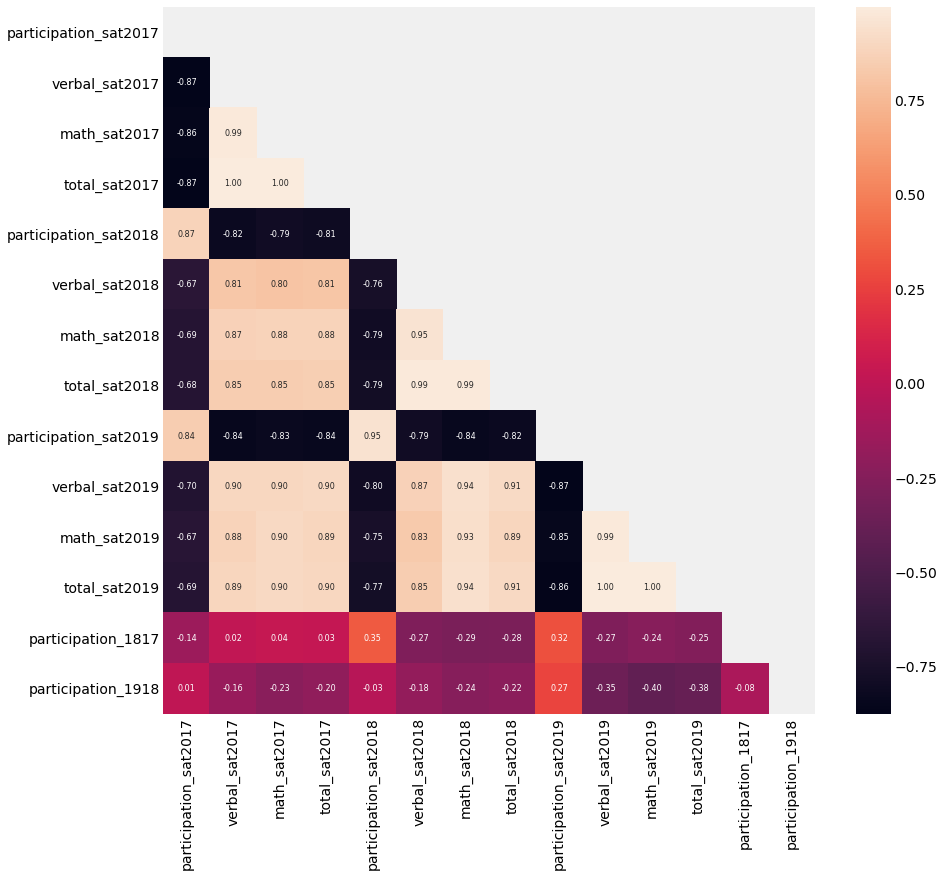

In [145]:
sat_correlation = sat_3years.corr()
mask = np.zeros_like(sat_correlation)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(13, 13))
heatmap = sns.heatmap(sat_correlation, annot=True, annot_kws={"size":8}, fmt='.2f', mask=mask)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
plt.show()

From the heatmap, we observe that 
1. verbal score is positively correlated with math score for each respective year.
2. participation rate is negatively correlated with total score for each respective year. 

### Histogram
Histogram is used to show distribution of numerical data.

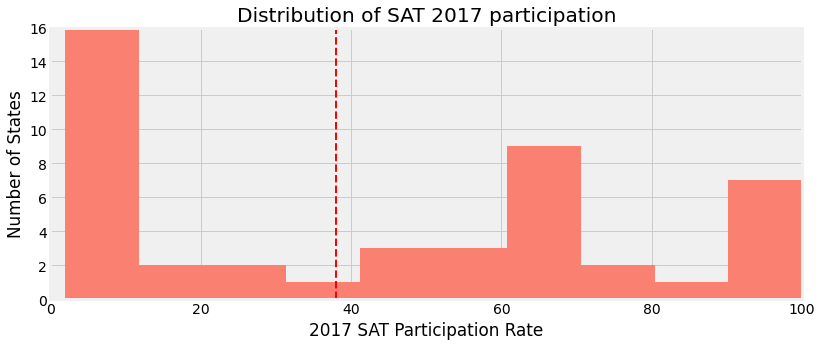

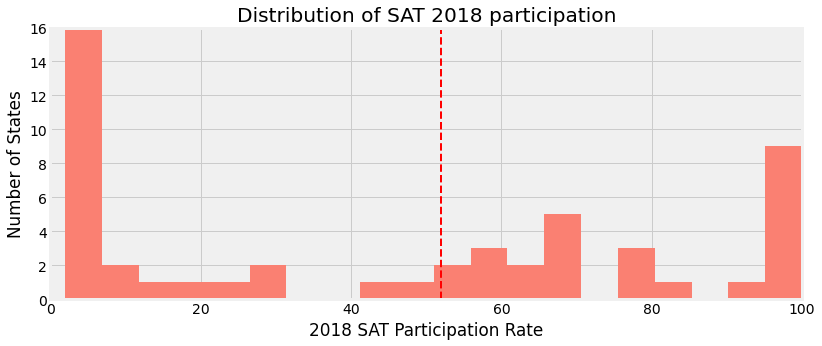

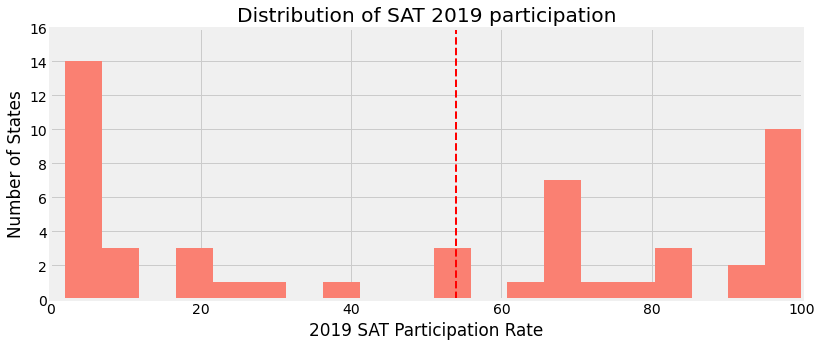

In [208]:
#Distribution of SAT 2017 participation
plt.figure(figsize=(12,5))
plt.hist(sat_3years['participation_sat2017'], color='salmon');
plt.xlabel('2017 SAT Participation Rate');
plt.ylabel('Number of States');
plt.axis([0, 100, 0, 16]);
plt.axvline(sat_3years.loc[:,'participation_sat2017'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
plt.title('Distribution of SAT 2017 participation');

#Distribution of SAT 2018 participation
plt.figure(figsize=(12,5))
plt.hist(sat_3years['participation_sat2018'],bins=20, color='salmon');
plt.xlabel('2018 SAT Participation Rate');
plt.ylabel('Number of States');
plt.axis([0, 100, 0, 16]);
plt.axvline(sat_3years.loc[:,'participation_sat2018'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
plt.title('Distribution of SAT 2018 participation');

#Distribution of SAT 2019 participation
plt.figure(figsize=(12,5))
plt.hist(sat_3years['participation_sat2019'],bins=20, color='salmon');
plt.xlabel('2019 SAT Participation Rate');
plt.ylabel('Number of States');
plt.axis([0, 100, 0, 16]);
plt.axvline(sat_3years.loc[:,'participation_sat2019'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
plt.title('Distribution of SAT 2019 participation');

The histograms show that the peak of the histogram tends to occur at both ends for each year. However, the peak on the left is slowly decreasing while the peak on the right is slowly increasing year by year. The median line has also shifted to the right, indicating slight increase in participation rate each year. 

### Box plot

Boxplot can be used to show outliers and differences in inter-quartile range in the underlying numerical data.

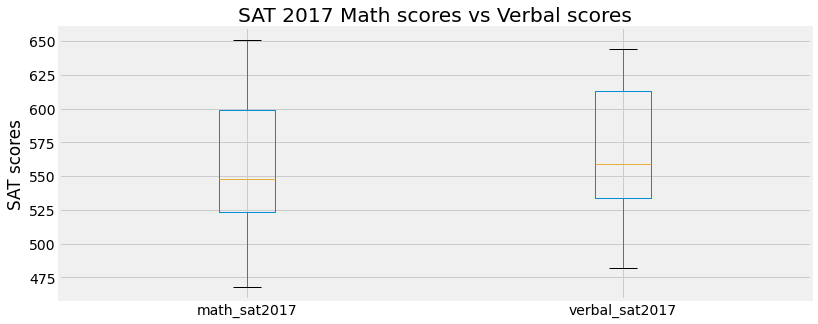

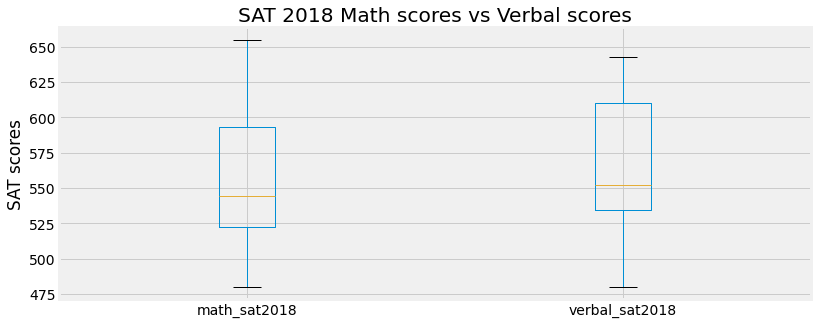

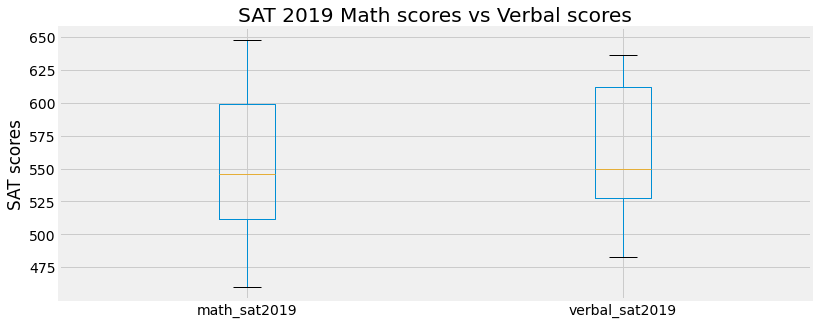

In [221]:
#Distribution of SAT 2017 participation
plt.figure(figsize=(12,5))
plt.ylabel('SAT scores');
sat_3years.boxplot(column=['math_sat2017','verbal_sat2017']);
plt.title('SAT 2017 Math scores vs Verbal scores');

#Distribution of SAT 2018 participation
plt.figure(figsize=(12,5))
plt.ylabel('SAT scores');
sat_3years.boxplot(column=['math_sat2018','verbal_sat2018']);
plt.title('SAT 2018 Math scores vs Verbal scores');

#Distribution of SAT 2019 participation
plt.figure(figsize=(12,5))
plt.ylabel('SAT scores');
sat_3years.boxplot(column=['math_sat2019','verbal_sat2019']);
plt.title('SAT 2019 Math scores vs Verbal scores');

Box plots show that students tend to do better in verbal compared to math as they have higher uppoer and lower quartile scores. The median for verbal section is also slightly higher than median for math in each year. The spread of math scores are wider compared to verbal. There are no outliers detected in these box plots.

### Scatterplot

Scatterplot is used to show relatioship between numerical data.

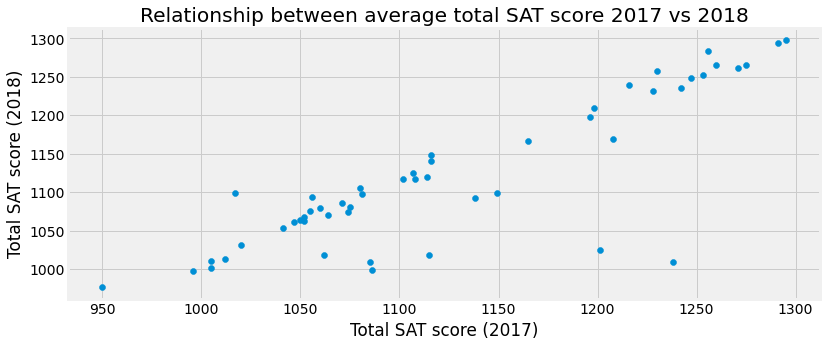

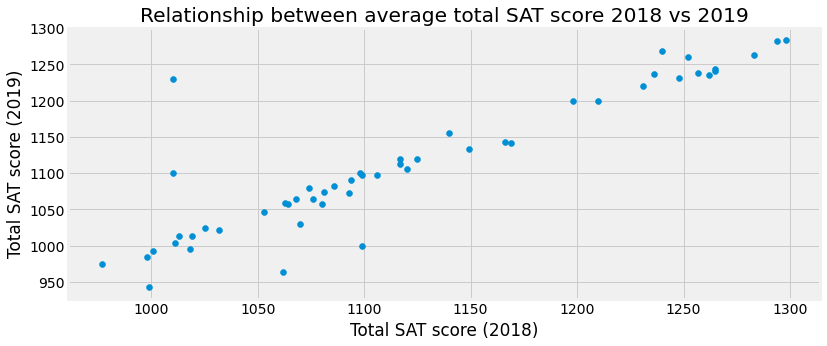

In [230]:
#scatterplot of average total SAT score 2017 vs 2018
plt.figure(figsize=(12,5))
plt.scatter(sat_3years['total_sat2017'],sat_3years['total_sat2018'])
plt.title('Relationship between average total SAT score 2017 vs 2018')
plt.xlabel('Total SAT score (2017)')
plt.ylabel('Total SAT score (2018)');

#scatterplot of average total SAT score 2018 vs 2019
plt.figure(figsize=(12,5))
plt.scatter(sat_3years['total_sat2018'],sat_3years['total_sat2019'])
plt.title('Relationship between average total SAT score 2018 vs 2019')
plt.xlabel('Total SAT score (2018)')
plt.ylabel('Total SAT score (2019)');

Average total SAT scores for 2017 vs 2018 and 2018 vs 2019 show strong positive relationship, indicating no significant changes of average scores for each state between years.

### Bar chart

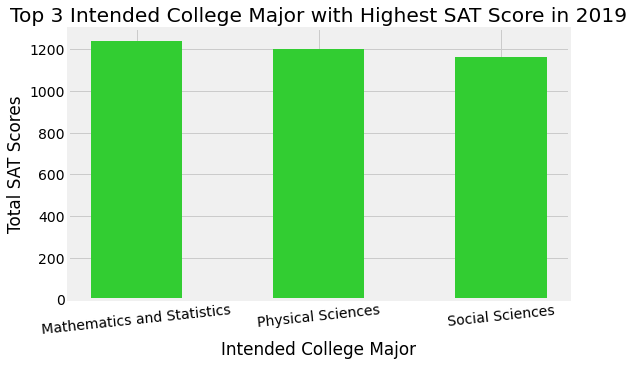

In [270]:
#top 3 intended college major with highest SAT score in 2019

sorted = sat_major.loc[:,['intended_major','total']].sort_values(by='total', ascending=False).head(3)

plt.figure(figsize=(8,5))
plt.bar(sorted['intended_major'],sorted['total'],width=0.5,color='limegreen');
plt.xlabel('Intended College Major')
plt.ylabel('Total SAT Scores');
plt.xticks(rotation = 6);
plt.title('Top 3 Intended College Major with Highest SAT Score in 2019');

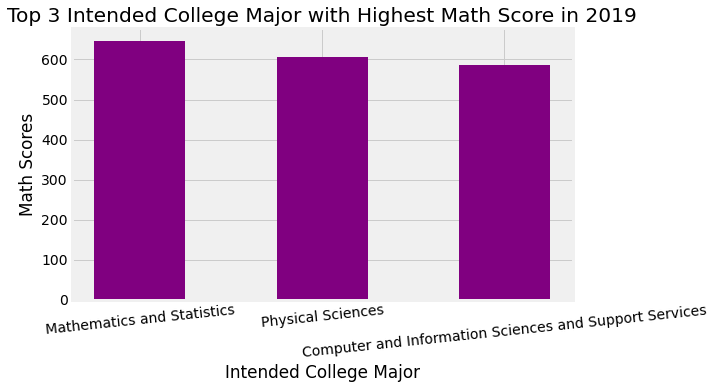

In [271]:
#top 3 intended college major with highest Math score in 2019

sorted = sat_major.loc[:,['intended_major','math']].sort_values(by='math', ascending=False).head(3)

plt.figure(figsize=(8,5))
plt.bar(sorted['intended_major'],sorted['math'],width=0.5,color='purple');
plt.xlabel('Intended College Major')
plt.ylabel('Math Scores');
plt.xticks(rotation = 6);
plt.title('Top 3 Intended College Major with Highest Math Score in 2019');


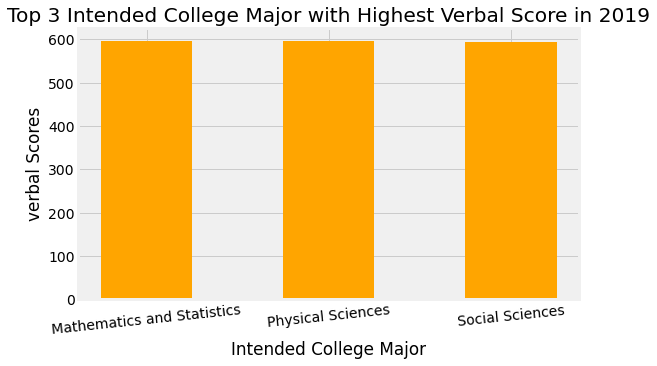

In [272]:
#top 3 intended college major with highest Verbal score in 2019

sorted = sat_major.loc[:,['intended_major','verbal']].sort_values(by='verbal', ascending=False).head(3)

plt.figure(figsize=(8,5))
plt.bar(sorted['intended_major'],sorted['verbal'],width=0.5,color='orange');
plt.xlabel('Intended College Major')
plt.ylabel('verbal Scores');
plt.xticks(rotation = 6);
plt.title('Top 3 Intended College Major with Highest Verbal Score in 2019');

The bar charts above show that the intended college majors with highest SAT score, highest verbal score, and highest math score in 2019 are Mathematics and Physical Sciences. 

## Conclusions and Recommendations

From our analysis, our SAT test is gaining more participation rate throughout the country. We can observe more positive trends towards SAT participation rate from the histogram as there is an increasing number of states that receive 100% participation scores and many states with low partipation scores show higher percentage in the last two years. 

There are 22 states with more than 50% SAT participation rate in all 3 years. However, District of Columbia is the only state among the 4 states with 100% participation rate in 2017 to have negative growth in the following year. Connecticut, Delaware, and Michigan have shown no change in participation rate year-to-year from 2017 to 2019. 

In terms of total score by state, Minnesota has earned the highest average total score for year 2017-2019 in the range of 1284-1298. Meanwhile, District of Columbia earns the lowest average total score for year 2017-2018 in the range of 950-977 and West Virginia has the lowest average total score of 943 in year 2019. The scatter plots of Average total SAT scores for 2017 vs 2018 and 2018 vs 2019 show strong positive relationship, indicating no significant changes of average scores for each state between years. Additionally, the Heat map shows that verbal score is positively correlated with math score for each respective year while participation rate is negatively correlated with total score for each respective year.

When looking into the total scores by intended college major (2019 only), we find that the intended college majors with highest SAT scores are those science-related majors such as Mathematics and Statistics, Physical Science, and Social Science. On the other hand, the intended college majors with lowest SAT scores are Mechanic and Repair Technologies/Technicians, Construction Trades, and Personal and Culinary Services. When comparing the total SAT score by state and total SAT score by intended college major, students who want to major in Mathematics are more likely to come from Minnesota and Wisconsin. There's a chance that these states have more students who want to pursue math majors.

Recommendations:

1. Gather more information on the causes of students performance in SAT in District of Columbia and West Virginia. Deep dive into the resources allocation, school district as such to find a way to improve scores of these states.  
2. Find out the drop in participation rate for District of Columbia. Not only that this state earns low average total score, but it also shows decrease in participation rate over years. 
3. Gather intended college major data by state in order to find out whether there is any correlation between states and intended college major.